In [1]:
from ROOT import TH1F, TCanvas, TF1

Welcome to JupyROOT 6.14/06


In [2]:
import numpy as np

In [3]:
from sklearn.metrics import mean_squared_error

In [139]:
data = np.load("/Users/cdesio/Downloads/out_data_300-2.npz")

In [140]:
for k in data.iterkeys():
    print(k)

y_gt
preds_gt
y_unet
preds_unet
y_15_unet
preds_15_unet
y_15_gt
preds_15_gt


/Users/cdesio/UoB/MAPS/gate_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  """Entry point for launching an IPython kernel.


In [141]:
y_gt = data["y_gt"]
preds_gt = data["preds_gt"]

In [142]:
mean = np.mean(y_gt-preds_gt)

In [143]:
mean

-0.0005555555555555573

In [144]:
histo_gt = TH1F("data","Distribution of prediction errors for ground truth", 50,-1.0,1.0)

Warning in <TROOT::Append>: Replacing existing TH1: data (Potential memory leak).


In [145]:
for i in (y_gt-preds_gt):
    histo_gt.Fill(i)

In [146]:
c = TCanvas()

In [147]:
f = TF1("f","gaus")
f.FixParameter(1,mean)

In [148]:
histo_gt.Fit(f, "S")

 FCN=1.99861 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=1.55844e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.37143e+02   1.54060e+01   1.29972e-02   7.11353e-07
   2  Mean         1.91667e-02     fixed    
   3  Sigma        2.39417e-02   2.19264e-03   3.02284e-05   4.94022e-03


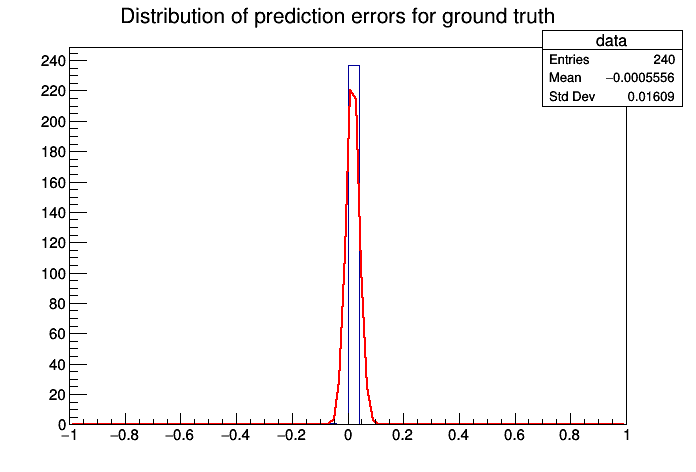

In [149]:
histo_gt.Draw()
c.Draw()

In [151]:
y_unet = data["y_unet"]
preds_unet = data["preds_unet"]

mean_unet = np.mean(y_unet-preds_unet)


 FCN=31 FROM MIGRAD    STATUS=CONVERGED     743 CALLS         744 TOTAL
                     EDM=1.15464e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.63078e+09   1.59370e+10   2.68496e+03  -3.74793e-14
   2  Mean        -7.40264e-02     fixed    
   3  Sigma        1.26312e-02   1.03045e-03   6.69184e-07  -6.51384e-02


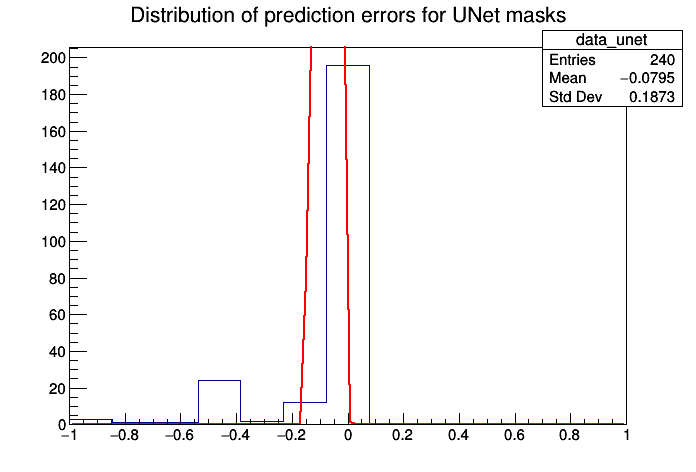

In [152]:
del histo_unet
histo_unet = TH1F("data_unet","Distribution of prediction errors for UNet masks", 13,-1.0,1.0)
for i in (y_unet-preds_unet):
    histo_unet.Fill(i)

c_unet = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_unet)

histo_unet.Fit(f, "S")
    
yax=histo_unet.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_unet.Draw()
c_unet.Draw()

 FCN=6.99574 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=5.13124e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.69143e+02   1.64141e+01   2.17074e-02  -8.17375e-07
   2  Mean         3.24444e-01     fixed    
   3  Sigma        2.67185e-01   9.16177e-03   1.47866e-05   2.27725e-03


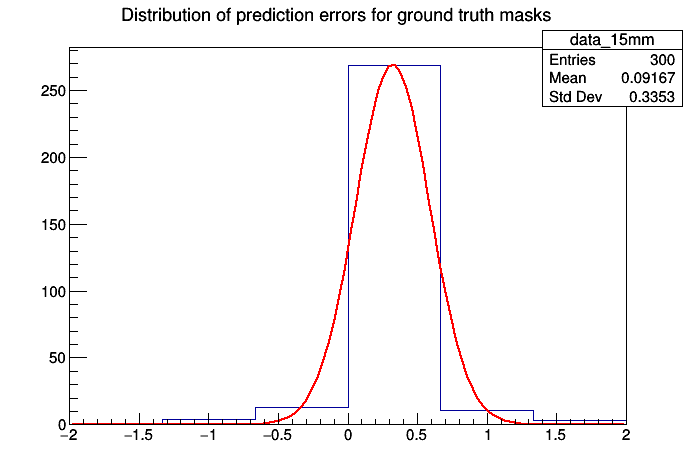

In [160]:
y_15_gt = data["y_15_gt"]
preds_15_gt = data["preds_15_gt"]

mean_15_gt = np.mean(y_15_gt-preds_15_gt)

#del histo_15_gt
histo_15_gt = TH1F("data_15mm","Distribution of prediction errors for ground truth masks", 6,-2.0,2.0)
for i in (y_15_gt-preds_15_gt):
    histo_15_gt.Fill(i)

c_15_gt = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_15_gt)

histo_15_gt.Fit(f, "S")
    
yax=histo_15_gt.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_15_gt.Draw()
c_15_gt.Draw()

 FCN=8.34272 FROM MIGRAD    STATUS=CONVERGED      47 CALLS          48 TOTAL
                     EDM=3.52536e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.10555e+01   6.14526e+00   7.08448e-03  -3.23921e-05
   2  Mean         6.66667e-02     fixed    
   3  Sigma        8.30736e-01   7.20681e-02   3.90784e-05  -1.01128e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_15mm_unet (Potential memory leak).


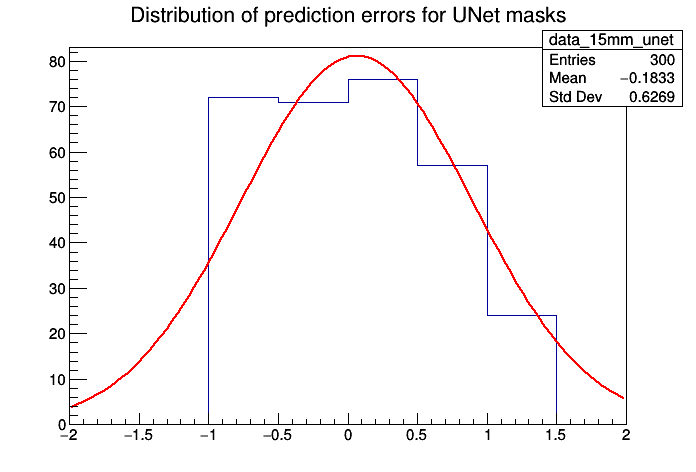

In [159]:
y_15_unet = data["y_15_unet"]
preds_15_unet = data["preds_15_unet"]

mean_15_unet = np.mean(y_15_unet-preds_15_unet)

#del histo_15_gt
histo_15_unet = TH1F("data_15mm_unet","Distribution of prediction errors for UNet masks", 8,-2.0,2.0)
for i in (y_15_unet-preds_15_unet):
    histo_15_unet.Fill(i)

c_15_unet = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_15_unet)

histo_15_unet.Fit(f, "S")
    
yax=histo_15_unet.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_15_unet.Draw()
c_15_unet.Draw()

### Test with double data

In [6]:
data = np.load("/Users/cdesio/Downloads/RF_predictions_clean_300_2batches-2.npz")

In [7]:
for k in data.iterkeys():
    print(k)

preds_1mm
y_1mm
preds_2mm
y_2mm
preds_3mm
y_3mm
preds_4mm
y_4mm
preds_10mm
y_10mm
preds_15mm
y_15mm
preds_20mm
y_20mm
preds_25mm
y_25mm
preds_30mm
y_30mm
preds_35mm
y_35mm


/Users/cdesio/UoB/MAPS/gate_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  """Entry point for launching an IPython kernel.


 FCN=8 FROM MIGRAD    STATUS=CONVERGED     147 CALLS         148 TOTAL
                     EDM=6.81031e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.53818e+02   2.02949e+02   9.04874e-02   1.83211e-07
   2  Mean         8.00000e-03     fixed    
   3  Sigma        1.66008e-02   1.18794e-03   3.96209e-06   4.55359e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_1mm (Potential memory leak).


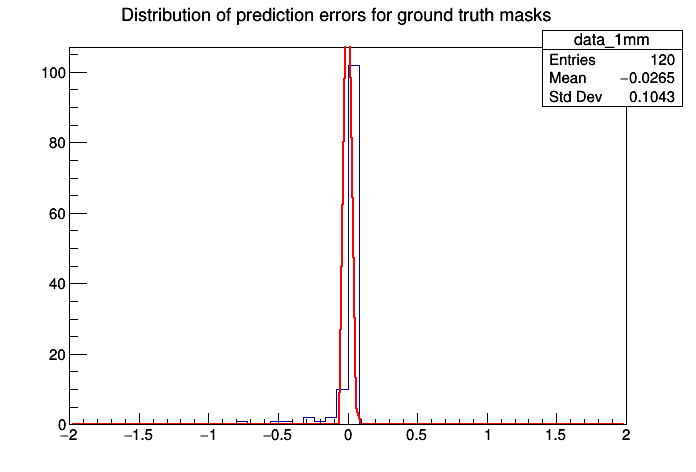

In [23]:
y_1mm = data["y_1mm"]
preds_1mm = data["preds_1mm"]

mean_1mm = np.mean(y_1mm-preds_1mm)

#del histo_15_gt
histo_1mm = TH1F("data_1mm","Distribution of prediction errors for ground truth masks", 50,-2.0,2.0)
for i in (y_1mm-preds_1mm):
    histo_1mm.Fill(i)

c_1mm = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_1mm)

histo_1mm.Fit(f, "S")
    
yax=histo_1mm.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_1mm.Draw()
c_1mm.Draw()

 FCN=27.2968 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=6.9167e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.16387e+01   9.15383e+00   1.66473e-02  -1.82212e-05
   2  Mean         3.33333e-02     fixed    
   3  Sigma        4.79303e-02   5.19033e-03   3.85623e-05  -4.90176e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_2mm (Potential memory leak).


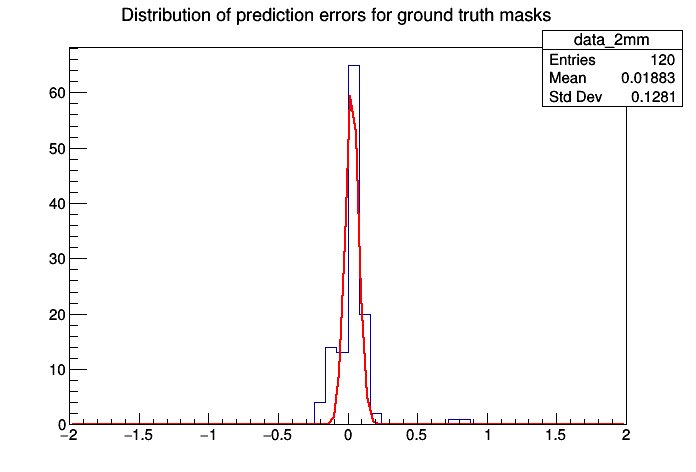

In [22]:
y_2mm = data["y_2mm"]
preds_2mm = data["preds_2mm"]

mean_2mm = np.mean(y_2mm-preds_2mm)

histo_2mm = TH1F("data_2mm","Distribution of prediction errors for ground truth masks", 50,-2.0,2.0)
for i in (y_2mm-preds_2mm):
    histo_2mm.Fill(i)

c_2mm = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_2mm)

histo_2mm.Fit(f, "S")
    
yax=histo_2mm.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_2mm.Draw()
c_2mm.Draw()

 FCN=30.9064 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=2.7419e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   6.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.79359e+01   1.07616e+01   5.89857e-01  -1.00380e-04
   2  Mean         2.40000e-02     fixed    
   3  Sigma        3.60807e-02   3.45769e-03  -9.68218e-04  -7.43604e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_3mm (Potential memory leak).


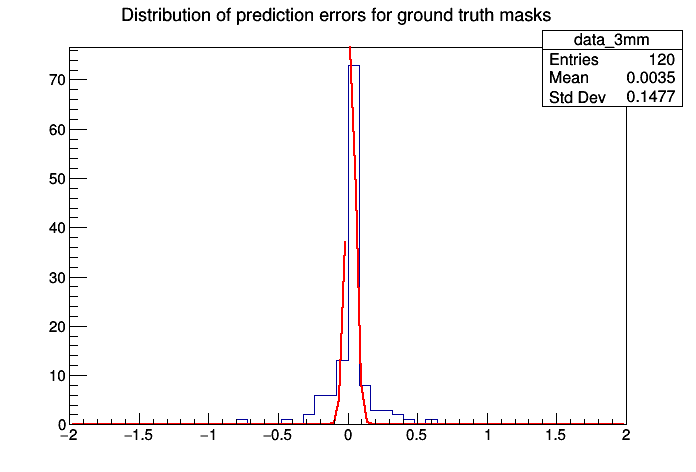

In [21]:
y_3mm = data["y_3mm"]
preds_3mm = data["preds_3mm"]

mean_3mm = np.mean(y_3mm-preds_3mm)

histo_3mm = TH1F("data_3mm","Distribution of prediction errors for ground truth masks", 50,-2.0,2.0)
for i in (y_3mm-preds_3mm):
    histo_3mm.Fill(i)

c_3mm = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_3mm)

histo_3mm.Fit(f, "S")
    
yax=histo_3mm.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_3mm.Draw()
c_3mm.Draw()

 FCN=7.99997 FROM MIGRAD    STATUS=CONVERGED      91 CALLS          92 TOTAL
                     EDM=1.94771e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.82691e+02   2.83909e+01   2.53049e-02  -8.01508e-06
   2  Mean         6.60000e-02     fixed    
   3  Sigma        2.34878e-02   1.70741e-03   1.19131e-05  -2.40200e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_4mm (Potential memory leak).


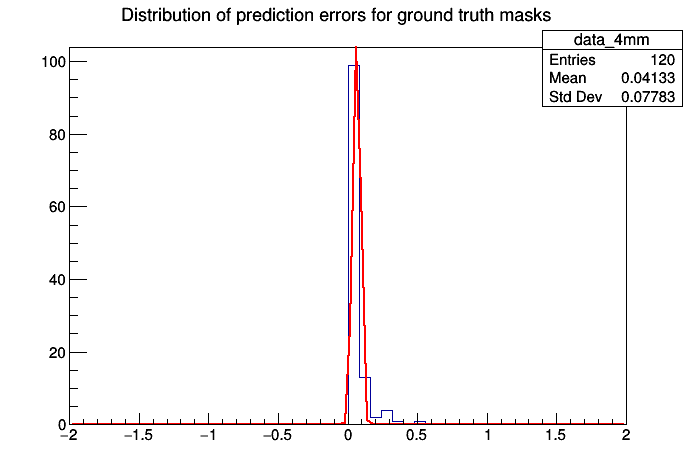

In [14]:
y_4mm = data["y_4mm"]
preds_4mm = data["preds_4mm"]

mean_4mm = np.mean(y_4mm-preds_4mm)

histo_4mm = TH1F("data_4mm","Distribution of prediction errors for ground truth masks", 50,-2.0,2.0)
for i in (y_4mm-preds_4mm):
    histo_4mm.Fill(i)

c_4mm = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_4mm)

histo_4mm.Fit(f, "S")
    
yax=histo_4mm.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_4mm.Draw()
c_4mm.Draw()

 FCN=2 FROM HESSE     STATUS=NOT POSDEF     10 CALLS          61 TOTAL
                     EDM=6.63556e-10    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.08378e+02   3.03456e+02   3.24487e-03   1.90007e-06
   2  Mean         1.96667e-02     fixed    
   3  Sigma        3.12560e-04   3.99949e-04   6.67919e-07   9.22933e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_10mm (Potential memory leak).


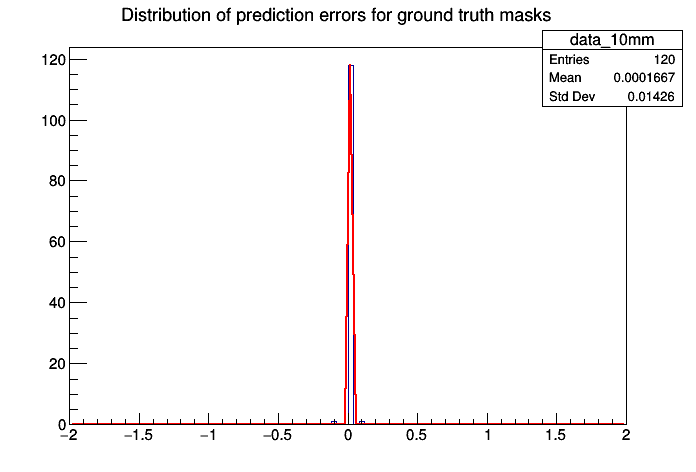

In [25]:
# y_10mm = data["y_10mm"]
preds_10mm = data["preds_10mm"]

mean_10mm = np.mean(y_10mm-preds_10mm)

histo_10mm = TH1F("data_10mm","Distribution of prediction errors for ground truth masks", 100 ,-2.0,2.0)
for i in (y_10mm-preds_10mm):
    histo_10mm.Fill(i)

c_10mm = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_10mm)

histo_10mm.Fit(f, "S")
    
yax=histo_10mm.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_10mm.Draw()
c_10mm.Draw()

 FCN=3.99974 FROM MIGRAD    STATUS=CONVERGED      49 CALLS          50 TOTAL
                     EDM=9.62326e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.12026e+02   1.05866e+01   1.13560e-02   1.00901e-05
   2  Mean         4.06667e-02     fixed    
   3  Sigma        3.07305e-02   2.34647e-03   2.48209e-05   4.77864e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_15mm (Potential memory leak).


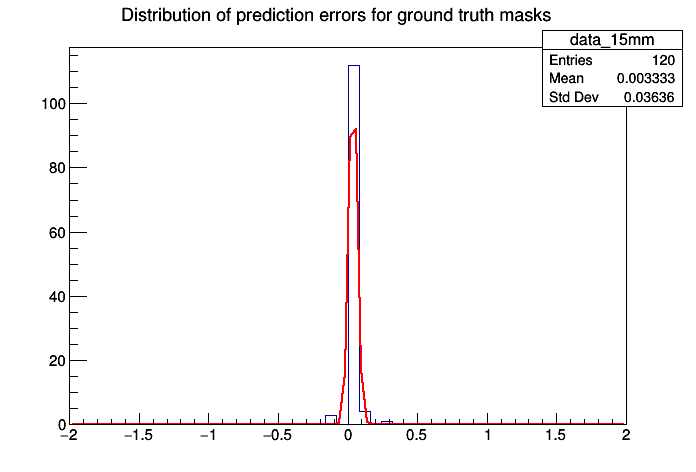

In [20]:
y_15mm = data["y_15mm"]
preds_15mm = data["preds_15mm"]

mean_15mm = np.mean(y_15mm-preds_15mm)

histo_15mm = TH1F("data_15mm","Distribution of prediction errors for ground truth masks", 50,-2.0,2.0)
for i in (y_15mm-preds_15mm):
    histo_15mm.Fill(i)

c_15mm = TCanvas()
f = TF1("f","gaus")
f.FixParameter(1,mean_15mm)

histo_15mm.Fit(f, "S")
    
yax=histo_15mm.GetYaxis()
yax.SetLimits(0,500)
#histo.SetAxisRange(0, 500,"y")
histo_15mm.Draw()
c_15mm.Draw()

In [27]:
data_pap = np.load("/Users/cdesio/Downloads/RF_predictions_clean_300_2batches_241025.npz")

for k in data_pap.iterkeys():
    print(k)


preds_tot
y_tot
preds_2mm
y_2mm
preds_4mm
y_4mm
preds_10mm
y_10mm
preds_15m
y_15mm
preds_25mm
y_25mm


/Users/cdesio/UoB/MAPS/gate_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: NpzFile.iterkeys is deprecated in python 3, to match the removal of dict.iterkeys. Use .keys() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
preds_tot = data_pap["preds_tot"]
y_tot = data_pap["y_tot"]
y_tot = np.hstack(y_tot)
preds_2mm = data_pap["preds_2mm"]
y_2mm = data_pap["y_2mm"]
preds_4mm = data_pap["preds_4mm"]
y_4mm = data_pap["y_4mm"]
preds_10mm = data_pap["preds_10mm"]
y_10mm = data_pap["y_10mm"]
preds_25mm = data_pap["preds_25mm"]
y_25mm = data_pap["y_25mm"]
preds_15mm = data_pap["preds_15m"]
y_15mm = data_pap["y_15mm"]

In [45]:
print(mean_squared_error(preds_tot, np.hstack(y_tot)))

0.000675925925925927


In [146]:
def gaus_fit(y_preds, y_true, keyword, n_bins = 10, histo_min = -1.0, histo_max = 1.0, key="ground truth"):
    true = y_true
    preds = y_preds

    mean = np.mean(true-preds)
    histo = TH1F("data_{}".format(keyword),"Distribution of prediction errors for {} estimations".format(key), 
                 n_bins,histo_min,histo_max)
    for i in (true-preds):
        histo.Fill(i)
    
    canvas = TCanvas()
    f = TF1("f","gaus")
    f.FixParameter(1,mean)

    histo.Fit(f, "S")
    
    yax=histo.GetYaxis()
    yax.SetLimits(0,500)
    #histo.SetAxisRange(0, 500,"y")
    histo.Draw()
    canvas.Draw()
    return histo, canvas

 FCN=4 FROM HESSE     STATUS=NOT POSDEF     10 CALLS          59 TOTAL
                     EDM=8.26153e-08    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.30875e+02   6.05000e+02   8.35585e-03  -1.06339e-05
   2  Mean         2.54622e-03     fixed    
   3  Sigma        5.13608e-04   3.30534e-04   6.52846e-07  -1.35909e-01


Warning in <TROOT::Append>: Replacing existing TH1: data_tot (Potential memory leak).


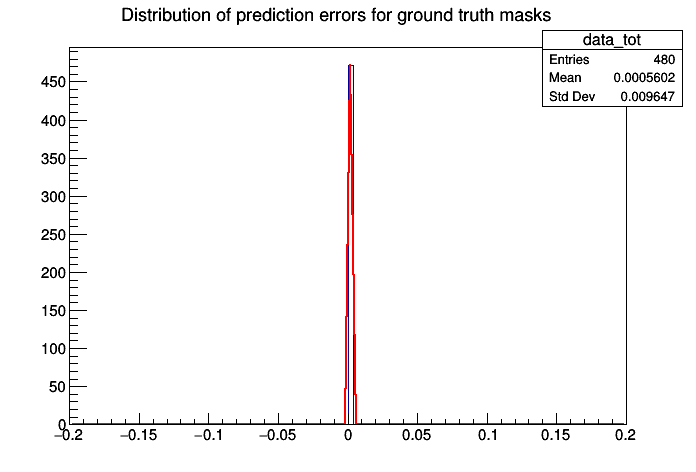

In [99]:
histo_tot, canvas_tot = gaus_fit(preds_tot, y_tot, "tot", n_bins=100, histo_min=-0.2, histo_max=0.2)

In [101]:
Xy_15 = np.load("/Users/cdesio/Downloads/Xy_15mm_2batch.npz")
preds_15 = Xy_15["preds_15"]
y_15 = Xy_15["y_15"]

 FCN=8.81843 FROM MIGRAD    STATUS=CONVERGED      48 CALLS          49 TOTAL
                     EDM=9.26264e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.28084e+01   9.73636e+00   1.36521e-02  -4.05559e-05
   2  Mean         1.97115e-01     fixed    
   3  Sigma        1.92743e-01   1.53438e-02   3.08791e-05  -1.77338e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_15mm (Potential memory leak).


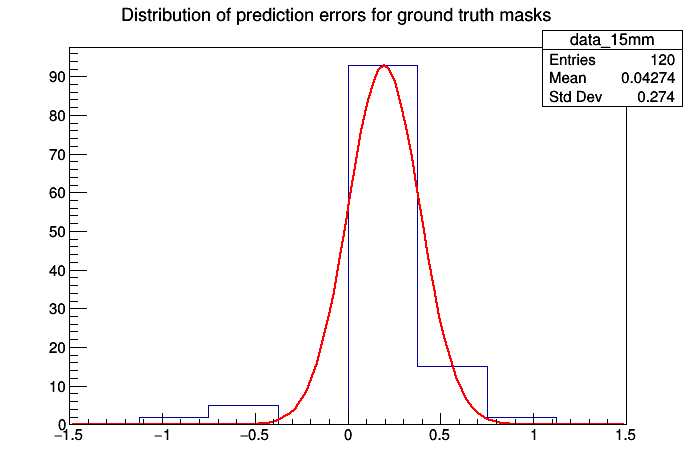

In [100]:
histo_15mm, canvas_15mm = gaus_fit(preds_15mm, y_15mm, "15mm", n_bins=8, histo_min=-1.5, histo_max=1.5)

 FCN=58.8305 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=2.98966e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.56837e+02   2.17021e+01   7.45824e-02  -1.16091e-05
   2  Mean         1.72727e-01     fixed    
   3  Sigma        1.50360e-01   5.36138e-03   3.00141e-05  -2.17006e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_15mm (Potential memory leak).


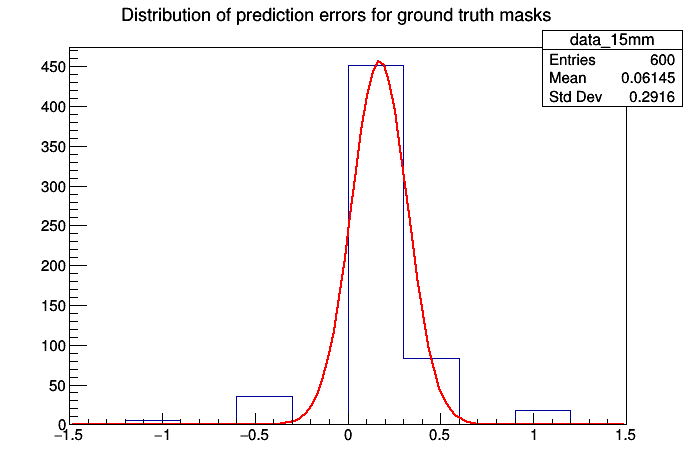

In [104]:
histo_15mm, canvas_15mm = gaus_fit(preds_15, y_15, "15mm", n_bins=10, histo_min=-1.5, histo_max=1.5)

### UNET

In [113]:
import matplotlib.pyplot as plt

In [105]:
Xy_test = np.load("/Users/cdesio/UoB/Jordan/Xy_test_clean_300_24_10_25.npz")

In [106]:
X_test = Xy_test["x"]

In [107]:
y_test = Xy_test["y"]

In [108]:
dist_test = Xy_test["dist"]

In [110]:
preds_500 = np.load("/Users/cdesio/Downloads/preds_500.npz")["preds_500"]

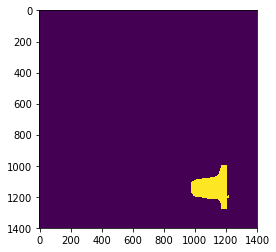

In [120]:
plt.imshow(preds_500[0][...,0])

In [121]:
predictions_new = np.load("/Users/cdesio/Downloads/rf_predictions_new.npz")

In [122]:
y_gt = predictions_new["y_gt"]
preds_gt = predictions_new["preds_test_gt"]
y_15_gt = predictions_new["y_15_gt"]
preds_15_gt = predictions_new["preds_15_gt"] 
y_test_unet = predictions_new["y_test_unet"]
preds_unet = predictions_new["preds_test_unet"]
y_15_unet = predictions_new["y_15_unet"]
preds_15_unet = predictions_new["preds_15_unet"]

 FCN=4 FROM MIGRAD    STATUS=CONVERGED     157 CALLS         158 TOTAL
                     EDM=5.98813e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.40387e+02   1.57777e+01   1.70851e-02  -6.96418e-06
   2  Mean         2.48333e-02     fixed    
   3  Sigma        2.27002e-02   2.08324e-03   1.97852e-05   1.32280e-03


Warning in <TROOT::Append>: Replacing existing TH1: data_gt (Potential memory leak).


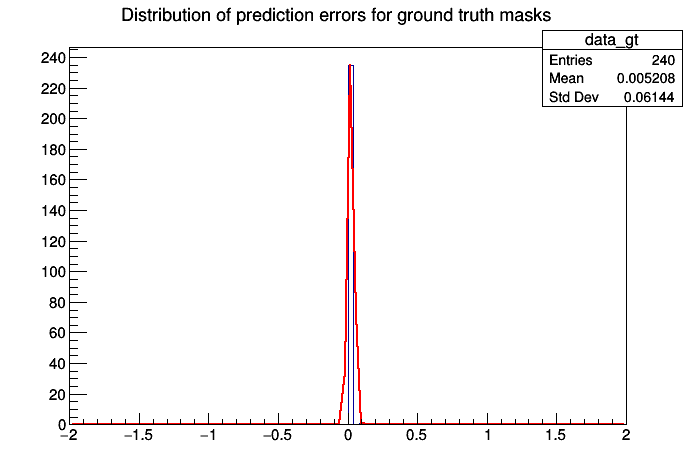

In [143]:
histo_gt, canvas_gt = gaus_fit(preds_gt, y_gt, "gt", n_bins=100, histo_min=-2, histo_max=2)

 FCN=69.7012 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=1.78458e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.54513e+02   7.08310e+01   1.34486e-01  -5.67018e-06
   2  Mean        -1.05556e-01     fixed    
   3  Sigma        2.77283e-01   1.27021e-02   1.95384e-05  -3.79522e-02


Warning in <TROOT::Append>: Replacing existing TH1: data_15mm_gt (Potential memory leak).


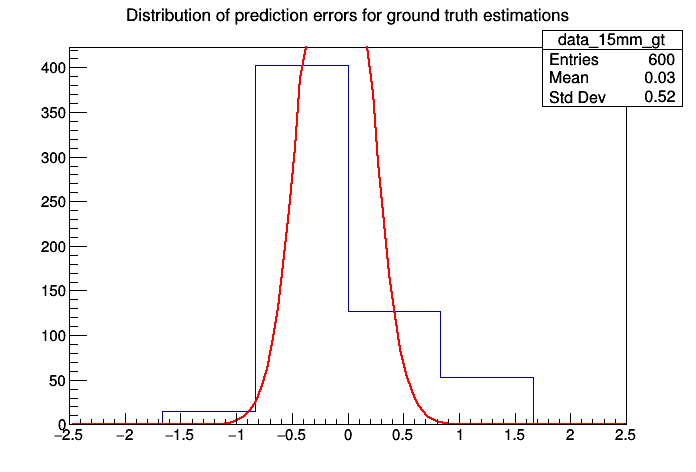

In [149]:
histo_15_gt, canvas_15_gt = gaus_fit(preds_15_gt, y_15_gt, "15mm_gt", n_bins=6, histo_min=-2.5, histo_max=2.5)

 FCN=147.885 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=1.00576e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.61061e+01   4.10412e+00   2.24128e-02   2.97045e-06
   2  Mean        -8.95833e-02     fixed    
   3  Sigma        6.13294e-01   4.50041e-02   1.56514e-04   4.74804e-04


Warning in <TROOT::Append>: Replacing existing TH1: data_unet (Potential memory leak).


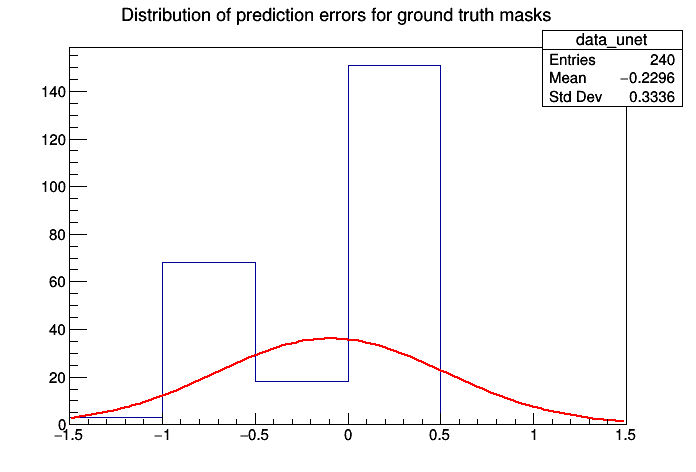

In [138]:
histo_unet, canvas_unet = gaus_fit(preds_unet, y_test_unet, "unet", n_bins=6, histo_min=-1.5, histo_max=1.5)

 FCN=18.859 FROM MIGRAD    STATUS=CONVERGED      48 CALLS          49 TOTAL
                     EDM=7.54271e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.10777e+02   1.67632e+01   2.80506e-02  -1.58102e-08
   2  Mean        -6.11111e-02     fixed    
   3  Sigma        4.97362e-01   1.71400e-02   1.78946e-05   9.74238e-05


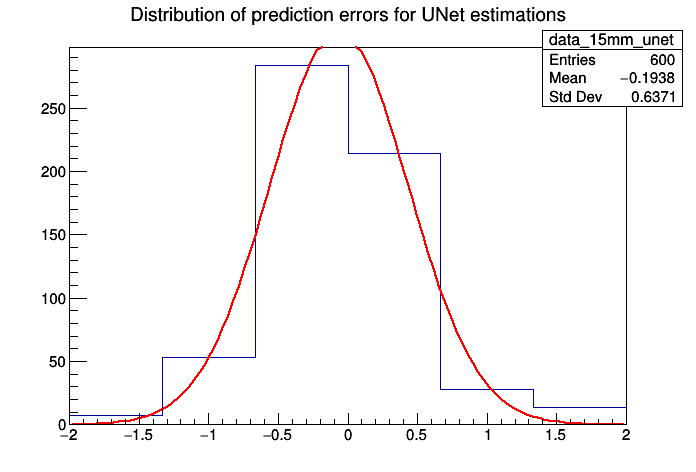

In [150]:
histo_15_unet, canvas_15_unet = gaus_fit(preds_15_unet-2, y_15_unet, "15mm_unet", n_bins=6, histo_min=-2, histo_max=2, key = "UNet")